#### Data Exploration and Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load dataset

df=pd.read_csv('ride_sharing_dataset.csv')
df.head(10)

,distance_miles,duration_minutes,hour,day_of_week,weather,temperature,pickup_location,dropoff_location,vehicle_type,driver_rating,price
0,1.41,6.3,1,1,Light Rain,78.0,Downtown,Residential,Luxury,4.4,20.62
1,9.03,40.8,7,6,Clear,93.0,Downtown,Entertainment,Standard,4.7,48.30
2,3.95,13.8,14,6,Clear,49.0,Residential,Business,Standard,4.6,12.71
3,2.74,8.2,16,6,Light Rain,59.0,Entertainment,Business,Premium,3.8,14.38
4,0.51,3.0,5,5,Light Rain,31.0,Airport,Entertainment,Standard,4.5,6.47
5,0.51,3.2,21,1,Cloudy,74.0,Business,Business,Standard,3.4,5.04
6,0.50,3.0,22,5,Light Rain,71.0,Residential,Airport,Luxury,5.0,22.32
7,6.03,20.0,5,3,Clear,56.0,Business,Downtown,Standard,3.3,19.10
8,2.76,7.9,13,0,Light Rain,89.0,Business,Downtown,Standard,3.6,10.28
9,3.69,14.4,16,5,Cloudy,93.0,Business,Business,Standard,3.3,12.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance_miles    100000 non-null  float64
 1   duration_minutes  100000 non-null  float64
 2   hour              100000 non-null  int64  
 3   day_of_week       100000 non-null  int64  
 4   weather           100000 non-null  object 
 5   temperature       98772 non-null   float64
 6   pickup_location   100000 non-null  object 
 7   dropoff_location  100000 non-null  object 
 8   vehicle_type      100000 non-null  object 
 9   driver_rating     98728 non-null   float64
 10  price             100000 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.4+ MB


In [4]:
df.shape

(100000, 11)

In [5]:
# check missing values
df.isnull().sum()


distance_miles         0
duration_minutes       0
hour                   0
day_of_week            0
weather                0
temperature         1228
pickup_location        0
dropoff_location       0
vehicle_type           0
driver_rating       1272
price                  0
dtype: int64

In [6]:
df.describe()

,distance_miles,duration_minutes,hour,day_of_week,temperature,driver_rating,price
count,100000.000000,100000.000000,100000.000000,100000.000000,98772.000000,98728.000000,100000.000000
mean,3.027364,11.646573,11.484920,2.997660,64.947283,4.174449,19.585327
std,2.943261,11.374444,6.920239,2.001203,14.846502,0.554809,18.600097
min,0.500000,3.000000,0.000000,0.000000,20.000000,1.500000,3.000000
25%,0.860000,3.500000,5.000000,1.000000,55.000000,3.800000,8.190000
50%,2.080000,7.600000,12.000000,3.000000,65.000000,4.200000,13.600000
75%,4.150000,15.300000,17.000000,5.000000,75.000000,4.600000,24.000000
max,35.220000,120.000000,23.000000,6.000000,100.000000,5.000000,200.000000


In [7]:
df.columns

Index(['distance_miles', 'duration_minutes', 'hour', 'day_of_week', 'weather',
       'temperature', 'pickup_location', 'dropoff_location', 'vehicle_type',
       'driver_rating', 'price'],
      dtype='object')

In [17]:
# Map numeric day to weekday name
day_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

# Create a new column with weekday names
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# Quick check
print(df[['day_of_week', 'day_of_week_name']].head(10))


   day_of_week day_of_week_name
0            1          Tuesday
1            6           Sunday
2            6           Sunday
3            6           Sunday
4            5         Saturday
5            1          Tuesday
6            5         Saturday
7            3         Thursday
8            0           Monday
9            5         Saturday


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


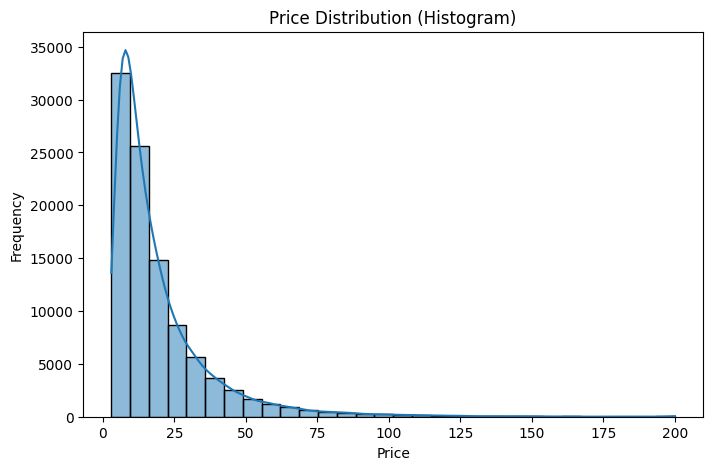

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution (Histogram)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

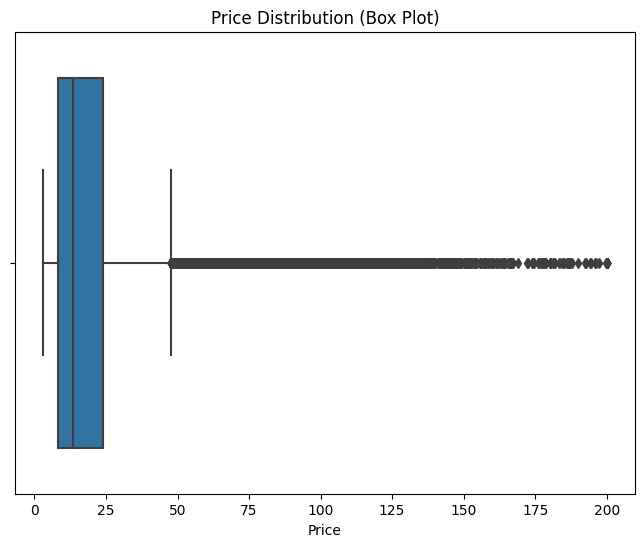

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (Box Plot)")
plt.xlabel("Price")
plt.show()

In [12]:
#key statistics
stats = df['price'].describe()
mean_val = df['price'].mean()
median_val = df['price'].median()
std_val = df['price'].std()

print(stats)
print(f"Mean: {mean_val}, Median: {median_val}, Std: {std_val}")


count    100000.000000
mean         19.585327
std          18.600097
min           3.000000
25%           8.190000
50%          13.600000
75%          24.000000
max         200.000000
Name: price, dtype: float64
Mean: 19.585327399999997, Median: 13.6, Std: 18.60009697643764


In [9]:
# outlier detect

Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1 - 1.5*IQR
upper_bound=Q3+1.5*IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")

lower bound: -15.525
upper bound: 47.715
Number of outliers: 6953


Should You Remove Them?

It depends on the context:
Keep them if:
These represent real high fares (e.g., long rides, luxury vehicles, surge pricing).
I want my model to learn about expensive trips. so I don't remove outliers


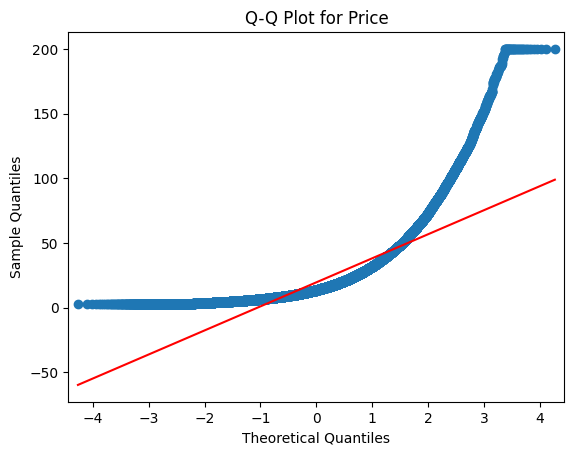

Shapiro-Wilk Test p-value: 0.0
Data is not normally distributed (reject H0).


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
#Normality test

from scipy.stats import shapiro, probplot

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(df['price'], line='s')
plt.title("Q-Q Plot for Price")
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(df['price'])
print(f"Shapiro-Wilk Test p-value: {p}")
if p > 0.05:
    print("Data looks normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")


#### Feature Distribution Analysis

In [19]:
df.columns


Index(['distance_miles', 'duration_minutes', 'hour', 'day_of_week', 'weather',
       'temperature', 'pickup_location', 'dropoff_location', 'vehicle_type',
       'driver_rating', 'price', 'day_of_week_name'],
      dtype='object')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


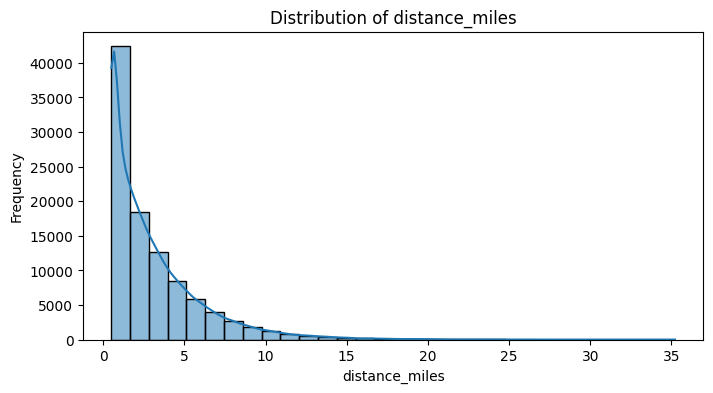

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


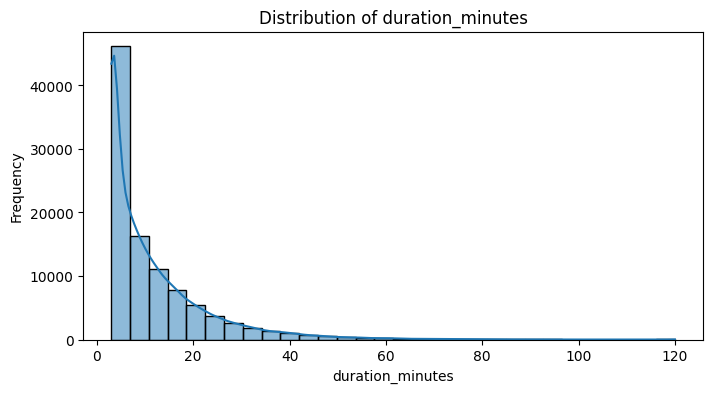

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


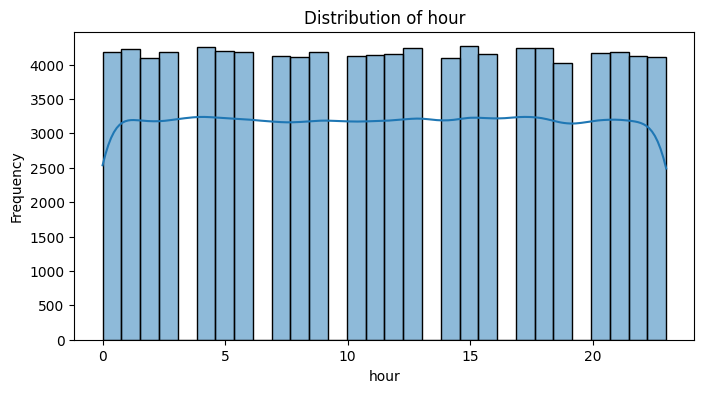

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


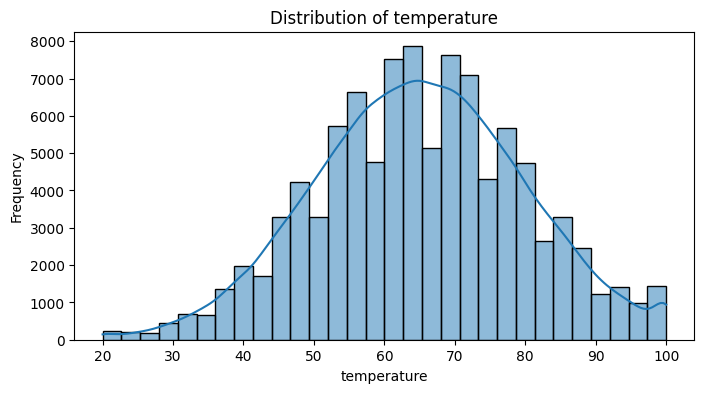

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


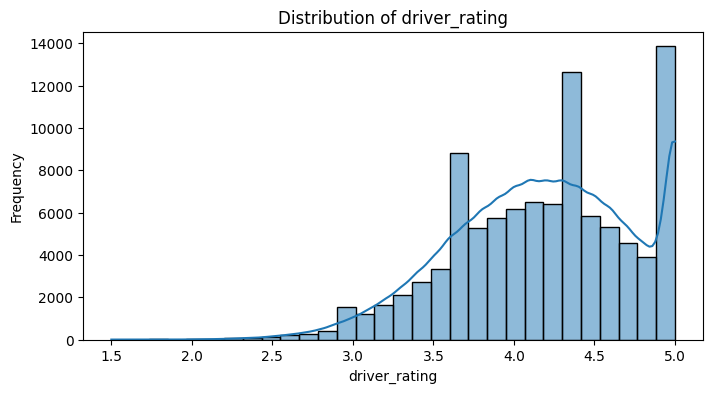

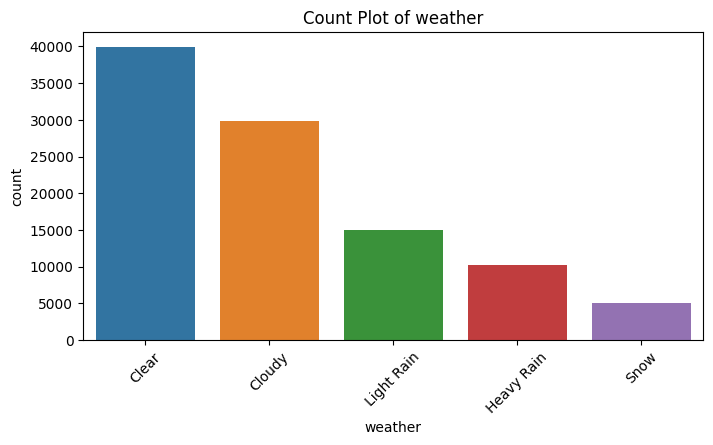

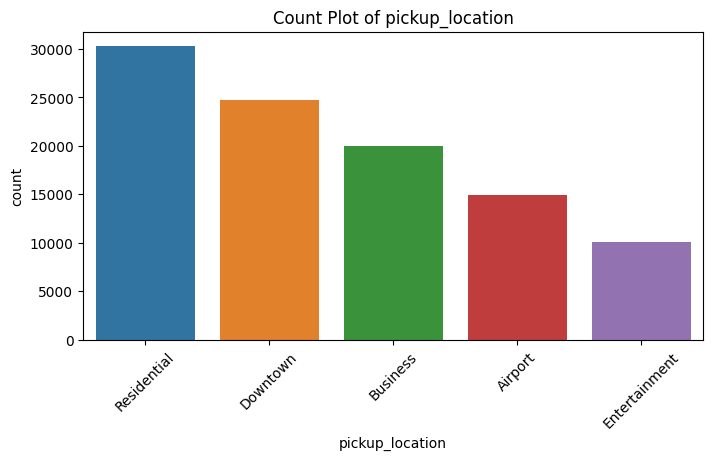

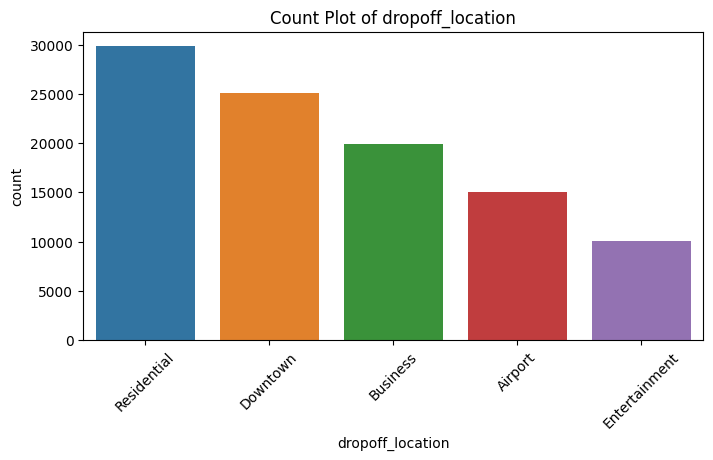

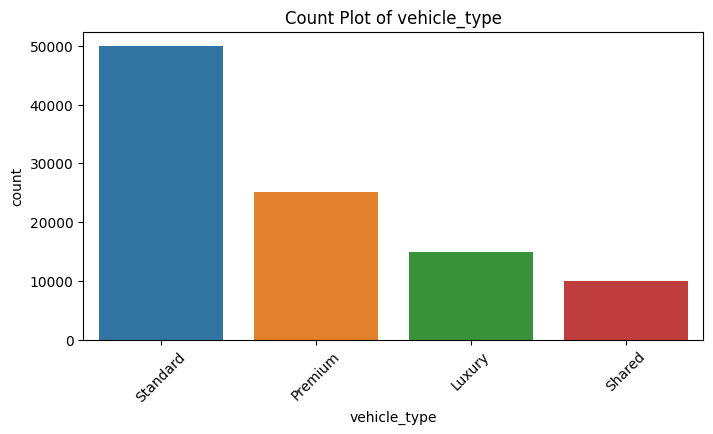

In [11]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

#remove target feature
if 'price' in numerical_features:
    numerical_features.remove('price')
    
if 'day_of_week' in numerical_features:
    numerical_features.remove('day_of_week')

# Plot distributions for numerical features
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot count plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
df['day_of_week_name'].value_counts()

day_of_week_name
Wednesday    14382
Sunday       14368
Monday       14336
Friday       14312
Tuesday      14246
Thursday     14240
Saturday     14116
Name: count, dtype: int64

Correlation Analysis


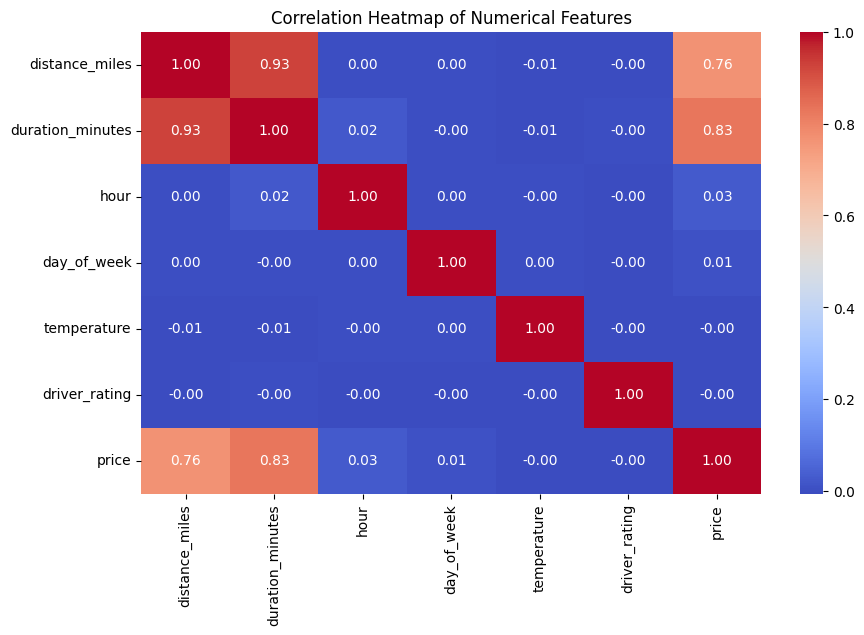

Top 3 features most correlated with price:
duration_minutes    0.827543
distance_miles      0.764690
hour                0.029611
Name: price, dtype: float64


In [12]:

num_df = df.select_dtypes(include=['int64', 'float64'])
# Calculate correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Top 3 features most correlated with price (absolute values, excluding price itself)
top_corr = corr_matrix['price'].drop('price').abs().sort_values(ascending=False).head(3)
print("Top 3 features most correlated with price:")
print(top_corr)

In [13]:
high_corr_pairs = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Display pairs with correlation > 0.8
print("\nPotential multicollinearity (corr > 0.8):")
print(high_corr_pairs[(high_corr_pairs < 1.0) & (high_corr_pairs > 0.8)])


Potential multicollinearity (corr > 0.8):
duration_minutes  distance_miles    0.927078
                  price             0.827543
dtype: float64


#### Part 2: Exploratory Data Analysis


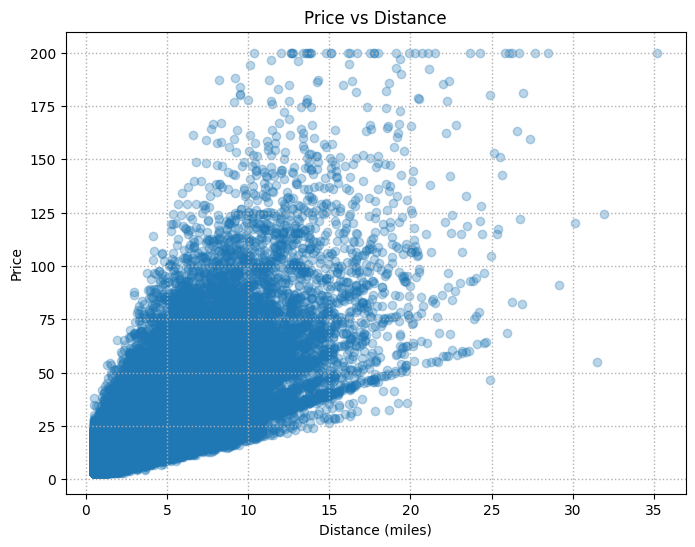

In [14]:
from scipy.stats import pearsonr

x = df["distance_miles"].values
y = df["price"].values

# 2) Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.3)
plt.title("Price vs Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Price")
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

In [26]:
# 3) Correlation coefficient (Pearson)
r, p = pearsonr(x, y)
print(f"Pearson r: {r:.3f}  |  p-value: {p:.3e}")

Pearson r: 0.765  |  p-value: 0.000e+00


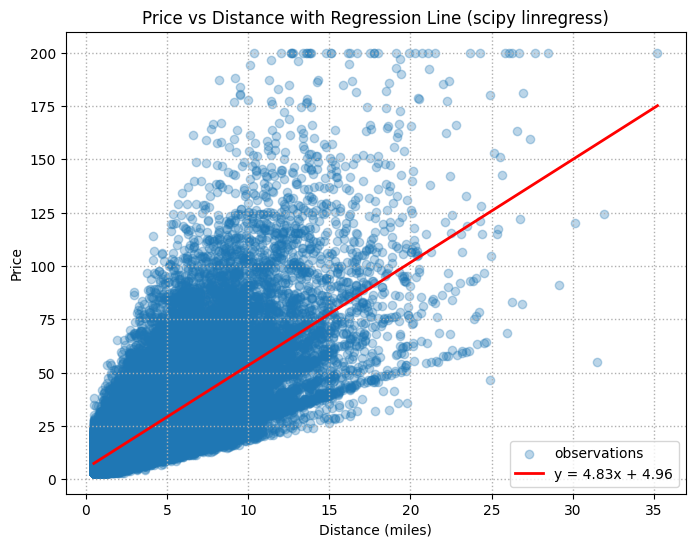

(4.83250291094269,
 4.955581574266599,
 0.7646904342656962,
 0.0,
 0.012877894614065962)

In [15]:
from scipy.stats import linregress
#Fit regression line using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.3, label="observations")
x_line = np.linspace(x.min(), x.max(), 200)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color="red", linewidth=2, label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.title("Price vs Distance with Regression Line (scipy linregress)")
plt.xlabel("Distance (miles)")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

# Show regression results
slope, intercept, r_value, p_value, std_err

The relationship is strong and linear: longer trips almost always cost more.

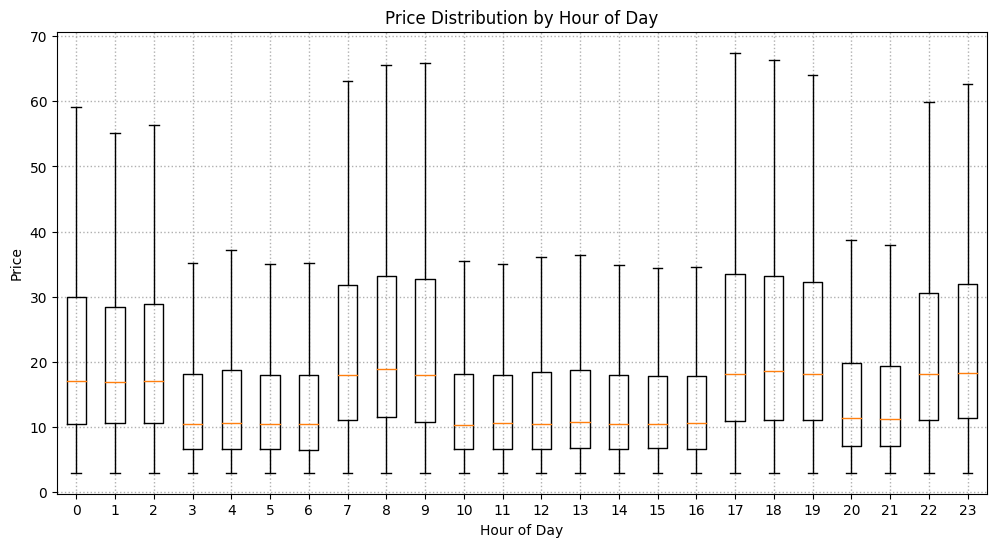

In [16]:
 # 1) Box plots: price by hour of day
plt.figure(figsize=(12,6))
# Prepare data in order 0..23
hour_order = sorted(df["hour"].unique())
data_by_hour = [df.loc[df["hour"]==h, "price"] for h in hour_order]
plt.boxplot(data_by_hour, labels=hour_order, showfliers=False)
plt.title("Price Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Price")
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

In [17]:
day_map = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
df["day_name"] = df["day_of_week"].map(day_map)

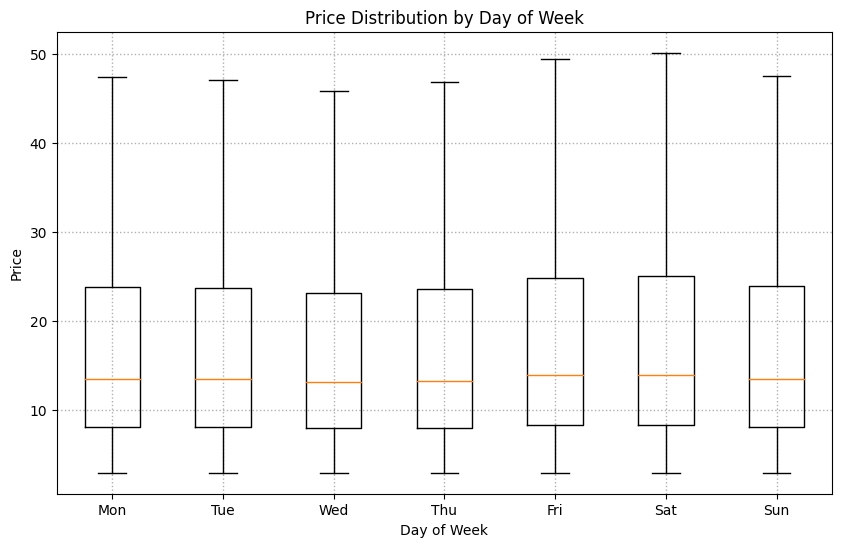

In [4]:
# 2) Box plots: price by day of week
# ---------------------------------------------------
plt.figure(figsize=(10,6))
day_order = [0,1,2,3,4,5,6]
data_by_day = [df.loc[df["day_of_week"]==d, "price"] for d in day_order]
plt.boxplot(data_by_day, labels=[day_map[d] for d in day_order], showfliers=False)
plt.title("Price Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Price")
plt.grid(True, linestyle=":", linewidth=1)
plt.show()

In [8]:
# 3) Average price by time periods
# ---------------------------------------------------
avg_by_hour = df.groupby("hour")["price"].mean().reindex(hour_order)
avg_by_day  = df.groupby("day_of_week")["price"].mean().reindex(day_order)


print("Average price by hour:")
print(avg_by_hour.round(2))
print("\nAverage price by day:")
print(avg_by_day.rename(index=day_map).round(2))

Average price by hour:
hour
0     23.73
1     23.26
2     23.58
3     14.48
4     14.86
5     14.38
6     14.53
7     25.53
8     26.33
9     25.71
10    14.80
11    14.63
12    14.69
13    14.86
14    14.42
15    14.52
16    14.54
17    26.05
18    26.60
19    26.11
20    15.97
21    15.88
22    25.13
23    25.88
Name: price, dtype: float64

Average price by day:
day_of_week
Mon    19.47
Tue    19.52
Wed    18.93
Thu    19.25
Fri    20.20
Sat    20.42
Sun    19.33
Name: price, dtype: float64


In [9]:
# 4) Identify peak pricing hours and days (by mean)
# ---------------------------------------------------
top_hours = avg_by_hour.sort_values(ascending=False).head(5)
top_days  = avg_by_day.sort_values(ascending=False).head(3)

print("\nTop 5 hours by mean price:")
print(top_hours.round(2))

print("\nTop 3 days by mean price:")
print(top_days.rename(index=day_map).round(2))


Top 5 hours by mean price:
hour
18    26.60
8     26.33
19    26.11
17    26.05
23    25.88
Name: price, dtype: float64

Top 3 days by mean price:
day_of_week
Sat    20.42
Fri    20.20
Tue    19.52
Name: price, dtype: float64


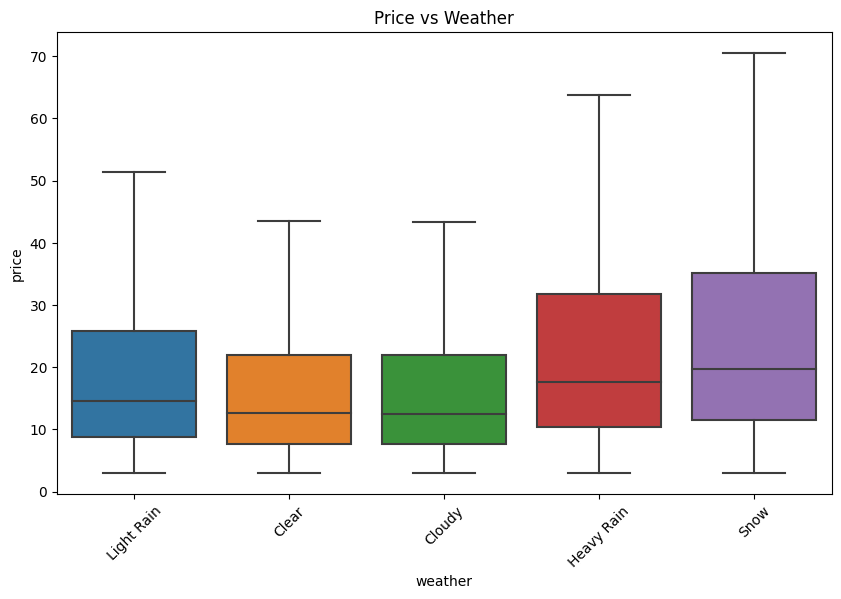

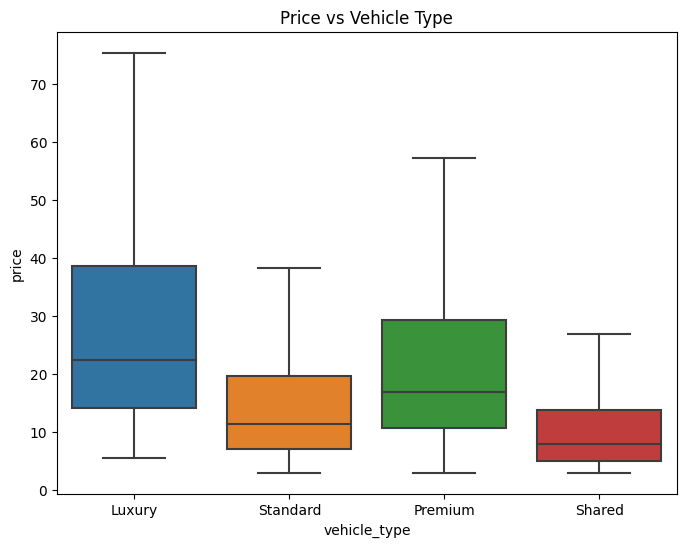

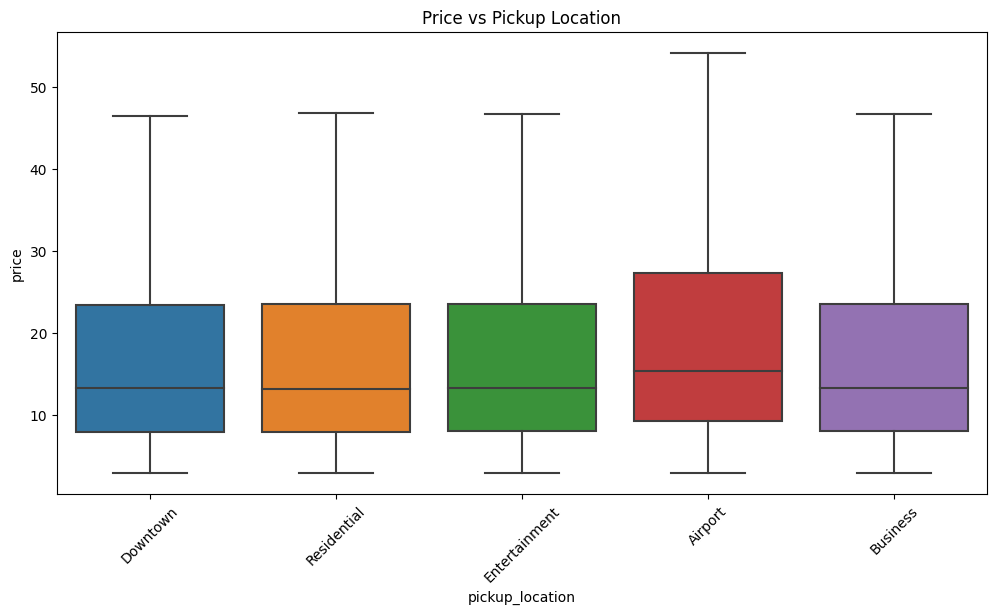

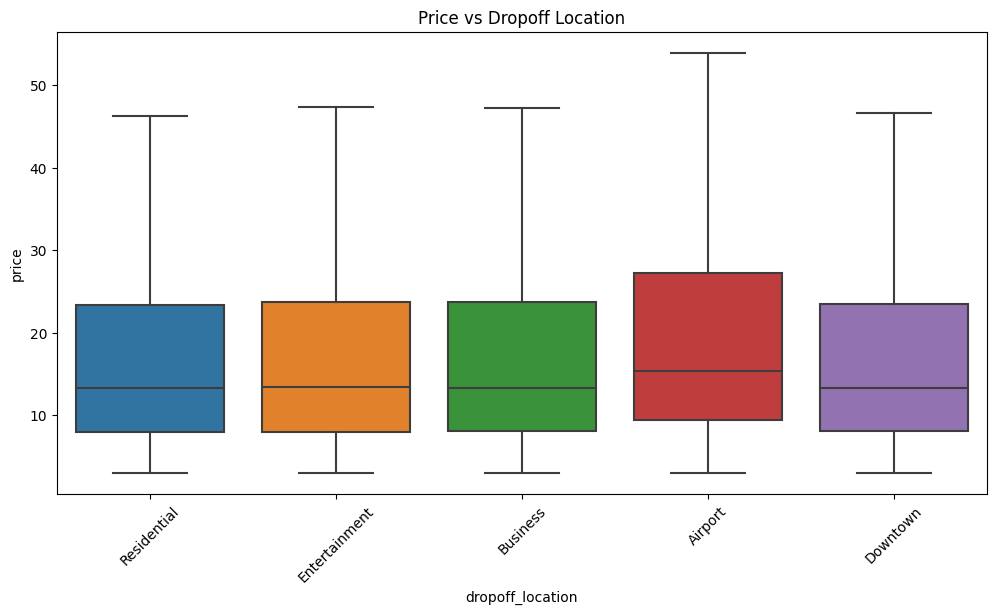

In [10]:


# 1) Boxplots for categorical features
# -----------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x="weather", y="price", data=df, showfliers=False)
plt.title("Price vs Weather")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="vehicle_type", y="price", data=df, showfliers=False)
plt.title("Price vs Vehicle Type")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="pickup_location", y="price", data=df, showfliers=False)
plt.title("Price vs Pickup Location")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="dropoff_location", y="price", data=df, showfliers=False)
plt.title("Price vs Dropoff Location")
plt.xticks(rotation=45)
plt.show()

In [11]:
# 2) Average price by category
# -----------------------------
avg_weather = df.groupby("weather")["price"].mean().sort_values(ascending=False)
avg_vehicle = df.groupby("vehicle_type")["price"].mean().sort_values(ascending=False)
avg_pickup  = df.groupby("pickup_location")["price"].mean().sort_values(ascending=False)
avg_dropoff = df.groupby("dropoff_location")["price"].mean().sort_values(ascending=False)

print("Average Price by Weather:\n", avg_weather, "\n")
print("Average Price by Vehicle Type:\n", avg_vehicle, "\n")
print("Average Price by Pickup Location:\n", avg_pickup.head(), "\n")
print("Average Price by Dropoff Location:\n", avg_dropoff.head(), "\n")

Average Price by Weather:
 weather
Snow          28.097480
Heavy Rain    25.476359
Light Rain    20.817172
Clear         17.880555
Cloudy        17.823261
Name: price, dtype: float64 

Average Price by Vehicle Type:
 vehicle_type
Luxury      31.303847
Premium     23.610292
Standard    15.730984
Shared      11.211223
Name: price, dtype: float64 

Average Price by Pickup Location:
 pickup_location
Airport          22.175483
Entertainment    19.238614
Business         19.150992
Residential      19.128249
Downtown         19.076829
Name: price, dtype: float64 

Average Price by Dropoff Location:
 dropoff_location
Airport          22.129775
Entertainment    19.237409
Business         19.223147
Downtown         19.145825
Residential      19.035538
Name: price, dtype: float64 



In [12]:
# 3) Identify Premium Categories
# -----------------------------
premium_weather = avg_weather.idxmax()
premium_vehicle = avg_vehicle.idxmax()
premium_pickup  = avg_pickup.idxmax()
premium_dropoff = avg_dropoff.idxmax()

print("Premium Pricing Categories:")
print(f"- Weather: {premium_weather}")
print(f"- Vehicle Type: {premium_vehicle}")
print(f"- Pickup Location: {premium_pickup}")
print(f"- Dropoff Location: {premium_dropoff}")

Premium Pricing Categories:
- Weather: Snow
- Vehicle Type: Luxury
- Pickup Location: Airport
- Dropoff Location: Airport


#### Handle Missing Values

In [18]:
df.isna().sum()

distance_miles         0
duration_minutes       0
hour                   0
day_of_week            0
weather                0
temperature         1228
pickup_location        0
dropoff_location       0
vehicle_type           0
driver_rating       1272
price                  0
day_name               0
dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: temperature
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [19]:
#missling values handle by median

df['temperature']=df['temperature'].fillna(df['temperature'].median())

In [20]:
df['driver_rating']=df['driver_rating'].fillna(df['driver_rating'].median())

#### Encode Categorical Variables

Label Encoding: Assigns a unique integer to each category. Good for ordinal data (where order matters).

One-Hot Encoding: Creates binary columns for each category. Good for nominal data (no order).

In [21]:
categorical_cols = ['weather', 'pickup_location', 'dropoff_location', 'vehicle_type']

# Show original data for comparison
print("Before encoding:\n", df.head())

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show data after encoding
print("\nAfter encoding:\n", df_encoded.head())

Before encoding:
    distance_miles  duration_minutes  hour  day_of_week     weather  \
0            1.41               6.3     1            1  Light Rain   
1            9.03              40.8     7            6       Clear   
2            3.95              13.8    14            6       Clear   
3            2.74               8.2    16            6  Light Rain   
4            0.51               3.0     5            5  Light Rain   

   temperature pickup_location dropoff_location vehicle_type  driver_rating  \
0         78.0        Downtown      Residential       Luxury            4.4   
1         93.0        Downtown    Entertainment     Standard            4.7   
2         49.0     Residential         Business     Standard            4.6   
3         59.0   Entertainment         Business      Premium            3.8   
4         31.0         Airport    Entertainment     Standard            4.5   

   price day_name  
0  20.62      Tue  
1  48.30      Sun  
2  12.71      Sun  
3  14.

In [25]:
df_encoded=df_encoded.drop('day_name', axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume df_encoded is the DataFrame after encoding
X = df_encoded.drop('price', axis=1)  # features
y = df_encoded['price']               # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data only
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

RMSE: 8.08
MAE: 5.25
R²: 0.806


In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Initialize and train
dt_model = DecisionTreeRegressor(random_state=3)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = dt_model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")


RMSE: 6.35
MAE: 3.60
R²: 0.880


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(random_state=3, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")


Random Forest Performance:
RMSE: 4.58
MAE: 2.65
R²: 0.938


In [33]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(
    estimators=[('lr', lr_model), ('dt', dt_model), ('rf', rf_model)]
)
# Training
voting_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_voting = voting_model.predict(X_test_scaled)

# Metrics
rmse_v = mean_squared_error(y_test, y_pred_voting, squared=False)
mae_v = mean_absolute_error(y_test, y_pred_voting)
r2_v = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor Performance:")
print(f"RMSE: {rmse_v:.2f}")
print(f"MAE: {mae_v:.2f}")
print(f"R²: {r2_v:.3f}")

Voting Regressor Performance:
RMSE: 5.17
MAE: 3.07
R²: 0.920


#### Performance Comparison

Random Forest: R² = 0.938  (best)

Voting Regressor: R² = 0.920

Decision Tree: R² = 0.880

Linear Regression: R² = 0.806

Voting Regressor Performance:
RMSE: 5.17
MAE: 3.07
R²: 0.920


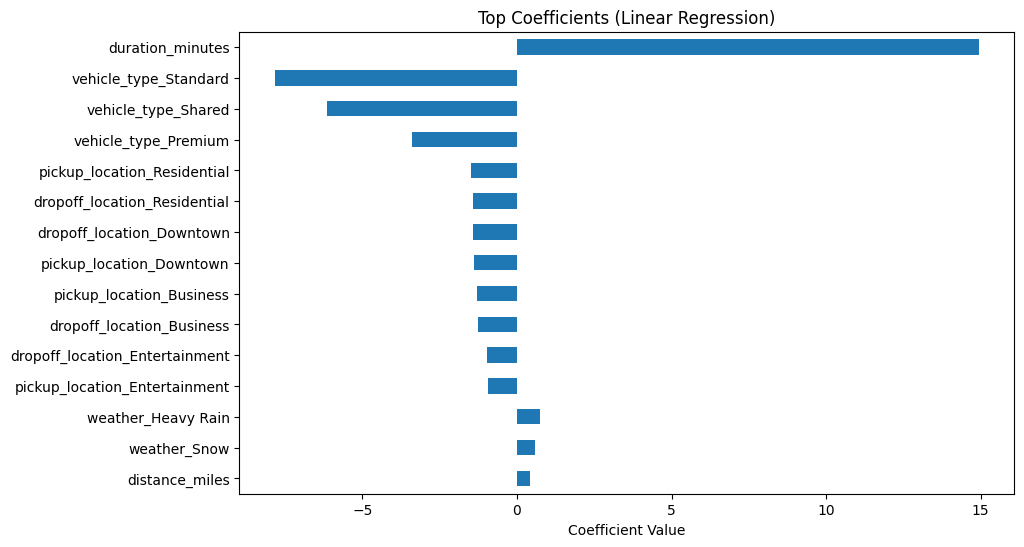

Top 10 coefficients:
 duration_minutes                14.953787
vehicle_type_Standard           -7.834677
vehicle_type_Shared             -6.131288
vehicle_type_Premium            -3.401726
pickup_location_Residential     -1.477238
dropoff_location_Residential    -1.434886
dropoff_location_Downtown       -1.424280
pickup_location_Downtown        -1.395376
pickup_location_Business        -1.294050
dropoff_location_Business       -1.257326
dtype: float64


In [31]:
coef_series = pd.Series(lr_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Plot top 15 coefficients
plt.figure(figsize=(10,6))
coef_series.head(15).plot(kind="barh")
plt.title("Top Coefficients (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

print("Top 10 coefficients:\n", coef_series.head(10))

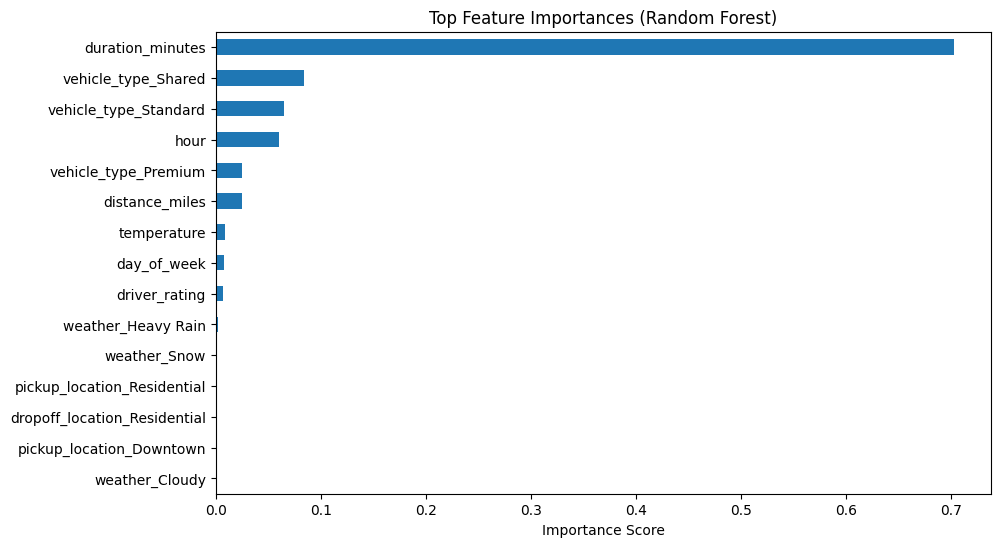

Top 10 features:
 duration_minutes         0.703005
vehicle_type_Shared      0.084370
vehicle_type_Standard    0.064644
hour                     0.059943
vehicle_type_Premium     0.024842
distance_miles           0.024681
temperature              0.008444
day_of_week              0.007444
driver_rating            0.007067
weather_Heavy Rain       0.002496
dtype: float64


In [32]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
importances.head(15).plot(kind="barh")
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

print("Top 10 features:\n", importances.head(10))

Duration is king → trip time drives prices more than distance.

Vehicle type matters → Luxury > Premium > Standard > Shared; upsell opportunity.

Time effects → peak hours and weekends show higher fares, reinforcing surge pricing.

Location patterns → airport and entertainment zones command premium, downtown/business cheaper.

Weather impact → rainy conditions slightly increase fares, could be priced more aggressively.